# Educational spending as a predictor for test scores

### Introduction
Does increased educational spending lead to better test scores? That is the primary question I wanted to answer with this project. In this Jupyter notebook I investigated the relationship between statewide educational spending and outcomes on standardized tests to better understand the impacts and limits of such spending which could potentially help inform public policy decisions.

This project showcases:
- **Data cleaning and manipulation**: By using data from multiple sources in different formats, I show how to combine different datasets in order to optimize analysis workflow.
- **Linear and polynomial regression**: Two different kinds of regression were used to model a continuous variable and compared using the mean absolute error (MAE).
- **Choropleth map visualization**: One of the best ways to show state-by-state data is to model the variables as a color intensity on a geographical map.

### Import data
We start by loading the data into a dataframe. We then removed Washington D.C. since it is not a state.

You can see the first few rows of the table below sorted by state. The columns are self-explanatory except perhaps the pct_valid column. This was the percentage of schools for which reliable spending data were available.

Also, it's worth noting that the test scores for each state are out of a maximum score of 500.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load data into dataframe
df = pd.read_csv('school_spending_outcome.csv')

# Remove Washington D.C.
df = df[df.states_abbrev != 'DC']

# Display first few rows
df.sort_values('states_abbrev').round(2).head()

,state,states_abbrev,spending,pct_valid,math,reading
27,Alaska,AK,19810.21,0.84,274.34,252.39
42,Alabama,AL,10147.72,0.95,268.70,253.40
24,Arkansas,AR,10031.05,0.92,274.36,258.78
43,Arizona,AZ,8607.74,0.50,279.93,259.48
31,California,CA,13015.60,0.49,275.61,258.83


### Distributions of spending and math and reading scores
As a first step, I wanted to look at the distribution of the variables under question.
You can see below that the spending and math scores have somewhat skewed distributions while the reading scores look fairly normally distributed.

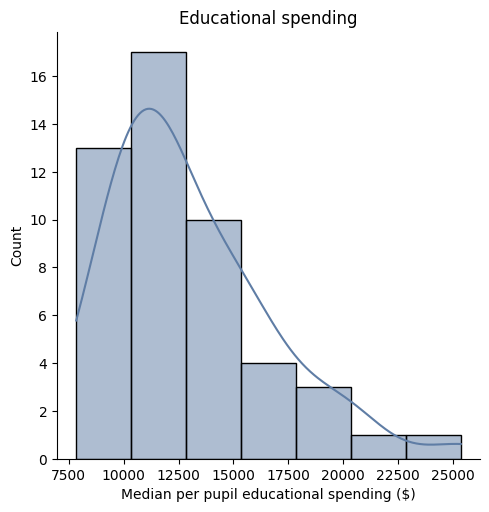

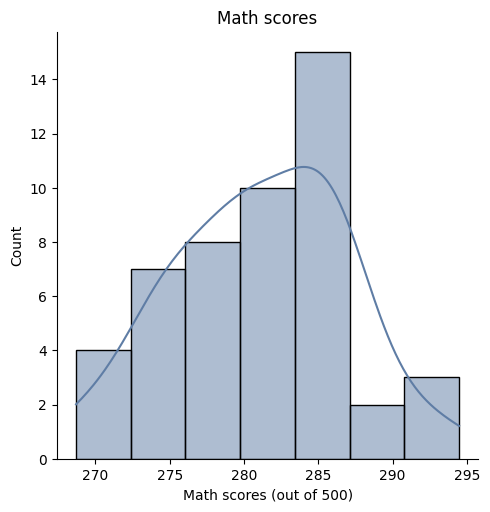

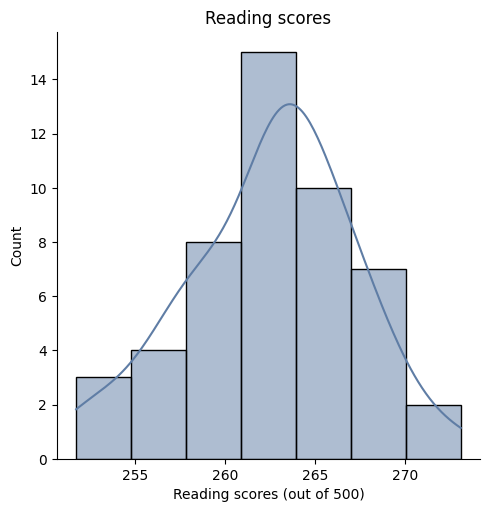

In [2]:
# Define colors used for plotting
blue = '#5F7DA5'
red = '#B07571'

# Spending distribution
sns.displot(df.spending, kde=True, color=blue)
plt.title('Educational spending')
plt.xlabel('Median per pupil educational spending ($)')
plt.show()

# Math scores distribution
sns.displot(df.math, kde=True, color=blue)
plt.title('Math scores')
plt.xlabel('Math scores (out of 500)')
plt.show()

# Reading scores distribution
sns.displot(df.reading, kde=True, color=blue)
plt.title('Reading scores')
plt.xlabel('Reading scores (out of 500)')
plt.show()

### Relationship between spending and test outcomes
The next thing I was interested in was the relationship between educational spending and test outcomes.

You can see below that there appears to be a positive correlation between educational spending and test scores in both math and reading. In other words, more spending appears to correlate with higher test scores.

But is this relationship statistically significant?

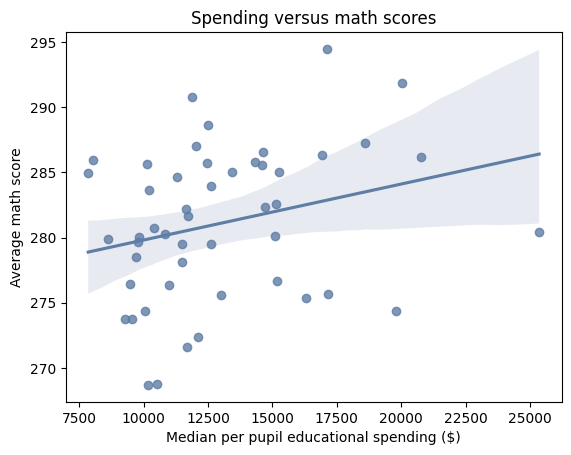

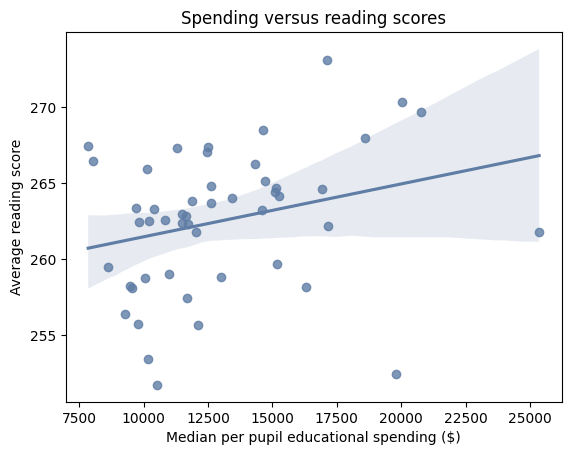

In [3]:
# Linear regression plot of spending and math scores
sns.regplot(x=df.spending, y=df.math, color=blue)
plt.title('Spending versus math scores')
plt.xlabel("Median per pupil educational spending ($)")
plt.ylabel("Average math score")
plt.show()

# Linear regression plot of spending and reading scores
sns.regplot(x=df.spending, y=df.reading, color=blue)
plt.title('Spending versus reading scores')
plt.xlabel("Median per pupil educational spending ($)")
plt.ylabel("Average reading score")
plt.show()

### Investigating the significance of the correlation
I investigated a few metrics related to the correlation between educational spending and test scores:
- Mean absolute error (MAE) - indicates how well the linear regression fits the data
- Pearson correlation coefficient (*r*) - measure the linear correlation between the two variables; this value is between 1 (a perfect negative correlation) and +1 (a perfect positive correlation)
- *p*-value - reveals the significance of the linear regression model; a lower *p*-value suggests a more significant relationship between the two variables 

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import r_regression

# Convert to numpy arrays for easier processing
spending = np.array(df.spending)
spending = np.reshape(spending, (-1, 1)) # expand dims to fit into sklearn model
math = np.array(df.math)
reading = np.array(df.reading)

# Create regression object
regression = LinearRegression()
regression.fit(spending, math)

# Calculate and print MAE and slope
mae = mean_absolute_error(math, regression.predict(spending))
print('Results for math test scores:')
print('MAE: ', round(mae,2))

# Calculate r and p-value for math
r_math = r_regression(spending,math)
_, p_math = f_regression(spending,math)
print("r: ", round(r_math[0],2))
print("p: ", round(p_math[0],3))

# Create regression object
regression = LinearRegression()
regression.fit(spending, reading)

# Calculate and print MAE and slope for reading
mae = mean_absolute_error(reading, regression.predict(spending))
print('\nResults for reading test scores:')
print('MAE: ', round(mae,2))

# Calculate r and p-value for reading
r_reading = r_regression(spending, reading)
_, p_reading = f_regression(spending,reading)
print("r: ", round(r_reading[0],2))
print("p: ", round(p_reading[0],3))

Results for math test scores:
MAE:  4.59
r:  0.27
p:  0.062

Results for reading test scores:
MAE:  3.49
r:  0.27
p:  0.057


The p-values are fairly low for both subjects. However, operating under the most rigid interpretation, these correlations would not be seen as significant since their p-values are both greater than .05. In reality there is usually a little more room for interpretability. In this case, there appears to be a notable connection between educational spending and test scores even if it doesn't meet the strictest definition of statistical significance.


### Fit polynomial regression

Out of curiosity, I wanted to fit a polynomial regression to see if it could serve as a better model to predict test scores based on educational spending.

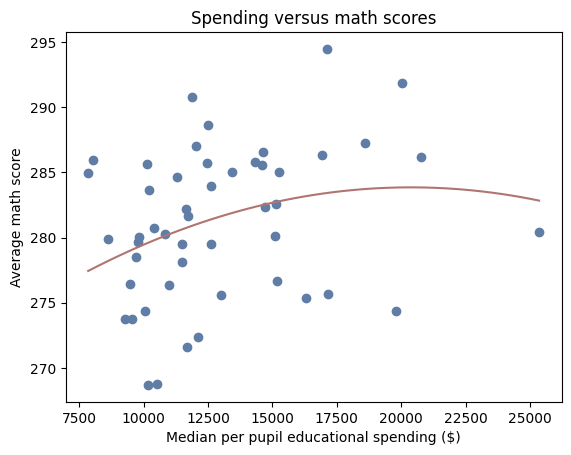

MAE: 4.51


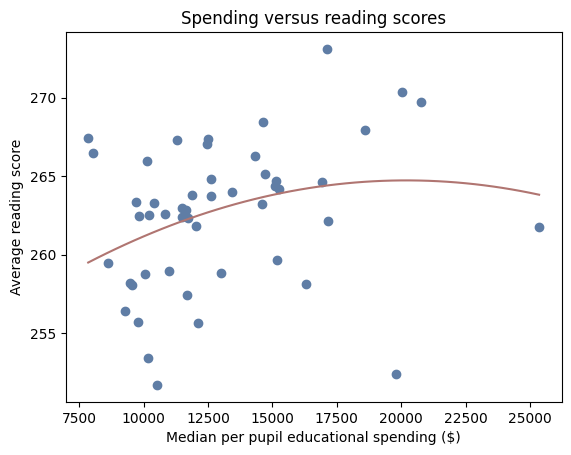

MAE:  3.36


In [5]:
from sklearn.preprocessing import PolynomialFeatures
n = 2 # polynomial degree
poly_feats = PolynomialFeatures(degree=n)
s_poly = poly_feats.fit_transform(spending)
x = np.linspace(min(spending),max(spending),49)

# Fit polynomial regression to spending-math relationship
regression = LinearRegression()
regression.fit(s_poly, math)

# Plot scatter plot with regression line
plt.scatter(spending, math, color=blue)
x_poly = poly_feats.fit_transform(x)
plt.plot(x, regression.predict(x_poly), color=red)
plt.title("Spending versus math scores")
plt.xlabel("Median per pupil educational spending ($)")
plt.ylabel("Average math score")
plt.show()

# Calculate and print MSE and slope
mae = mean_absolute_error(math, regression.predict(s_poly))
print('MAE:' , round(mae,2))

# Fit polynomial regression to spending—reading relationship
regression = LinearRegression()
regression.fit(s_poly, reading)

# Plot scatter plot with regression line
plt.scatter(spending, reading, color='#5F7DA5')
x = np.linspace(min(spending),max(spending),50)
x_poly = poly_feats.fit_transform(x)
plt.plot(x, regression.predict(x_poly), color='#B07571')
plt.title("Spending versus reading scores")
plt.xlabel("Median per pupil educational spending ($)")
plt.ylabel("Average reading score")
plt.show()

# Calculate and print MSE and slope
mae = mean_absolute_error(reading, regression.predict(s_poly))
print('MAE: ', round(mae,2))

It looks like there is a _slightly_ better fit for the polynomial regression compared to the linear regression as indicated by the lower mean absolute errors. However, this difference isn't very large (between 0.08 and 0.13), so I would probably go with the simplicity of the linear regression.

### Spending-to-outcome ratio
Another way to examine these data is to look at which states have the best test scores per dollar spent. In other words, which states are getting the best "bang for their buck" in terms of test scores. By dividing educational spending by test scores you can see how much money is spent per point.

Below are the lists of the 10 best and worst states by this measure for both math and reading scores.

In [6]:
# Calculate ratios and get sorted indices to apply to states list
ratio_math = np.squeeze(spending) / np.squeeze(math)
#ratio_math = ratio_math / max(ratio_math)
ratio_reading = np.squeeze(spending) / np.squeeze(reading)
#ratio_reading = ratio_reading / max(ratio_reading)
sorted_indices_math = sorted(range(len(ratio_math)), key=lambda i: ratio_math[i])

sorted_indices_read = sorted(range(len(ratio_reading)), key=lambda i: ratio_reading[i])

states = df.state.values # list of states in original (arbitrary) order

# # Show top ratios for math and reading
states_math_sorted = [states[i] for i in sorted_indices_math]
print("\n10 best spending-to-outcome ratios in math:")
[print(state) for state in states_math_sorted[0:10]]

states_read_sorted = [states[i] for i in sorted_indices_read]
print("\n10 best spending-to-outcome ratios in reading:")
[print(state) for state in states_read_sorted[0:10]]

# Show bottom ratios for math and reading
states_math_sorted = [states[i] for i in sorted_indices_math]
print("\n10 worst spending-to-outcome ratios in math:")
[print(state) for state in states_math_sorted[-10:][::-1]]

states_read_sorted = [states[i] for i in sorted_indices_read]
print("\n10 worst spending-to-outcome ratios in reading:")
[print(state) for state in states_read_sorted[-10:][::-1]]


10 best spending-to-outcome ratios in math:
Utah
Idaho
Arizona
Mississippi
Oklahoma
Nevada
Florida
Tennessee
Texas
Indiana

10 best spending-to-outcome ratios in reading:
Utah
Idaho
Arizona
Mississippi
Oklahoma
Florida
Nevada
Tennessee
Indiana
Texas

10 worst spending-to-outcome ratios in math:
New York
Connecticut
Alaska
New Jersey
New Hampshire
Rhode Island
Hawaii
Wyoming
Massachusetts
Delaware

10 worst spending-to-outcome ratios in reading:
New York
Alaska
Connecticut
New Jersey
New Hampshire
Rhode Island
Wyoming
Hawaii
Massachusetts
Delaware


[None, None, None, None, None, None, None, None, None, None]

### Choropleth map of spending-to-outcome ratios
To visualize thist metric, I have created a choropleth map of the U.S. A dark blue hue means better spending-to-outcome ratio while a more orange hue indicates a worse ratio.

New York state sticks out like a sore thumb. It looks like it is an outlier with uniquely bad ratio of educational spending to test scores.

In [38]:
colorscale = ['#5F7DA5','#6C819F','#79859D','#87899C','#948D96','#A19192',
              '#AF958E','#BC998C','#C9A08A','#D7A185', '#E5A583', '#F3A981']

# Math ratio map
fig = px.choropleth(df,
                    locations='states_abbrev',
                    locationmode='USA-states',
                    scope='usa',
                    color=ratio_math,
                    color_continuous_scale=colorscale,
                    labels={'color':'$ per pt'}
                   )
fig.update_layout(title_text='Dollar spent per point in math')
fig.show()

# Reading ratio map
fig = px.choropleth(df,
                    locations='states_abbrev',
                    locationmode='USA-states',
                    scope='usa',
                    color=ratio_reading,
                    color_continuous_scale=colorscale,
                    labels={'color':'$ per pt'}
                   )
fig.update_layout(title_text='Dollar spent per point in reading')
fig.show()

### Bar chart representation
The gradients in the above maps can be a little hard to distinguish because New York is such an outlier. The below bar charts show this a little better.

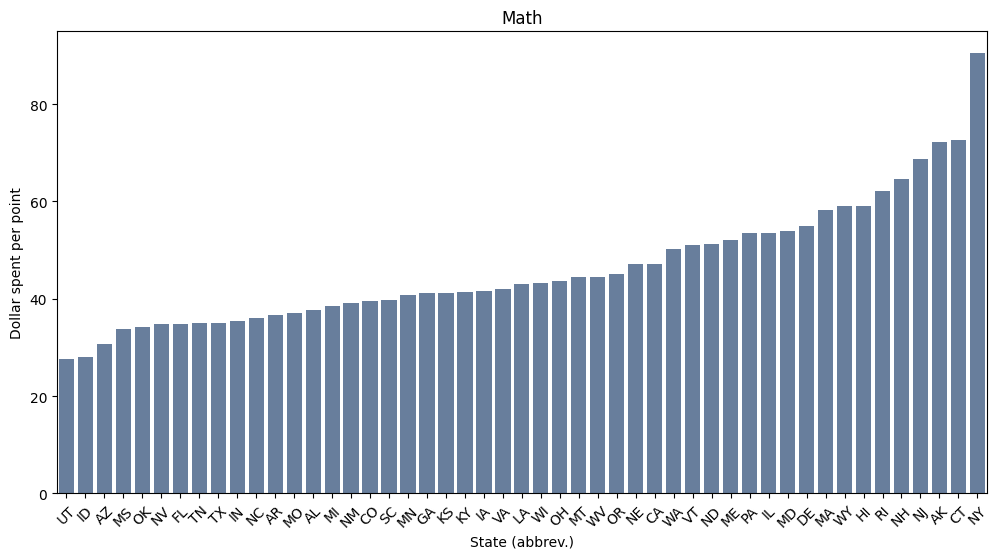

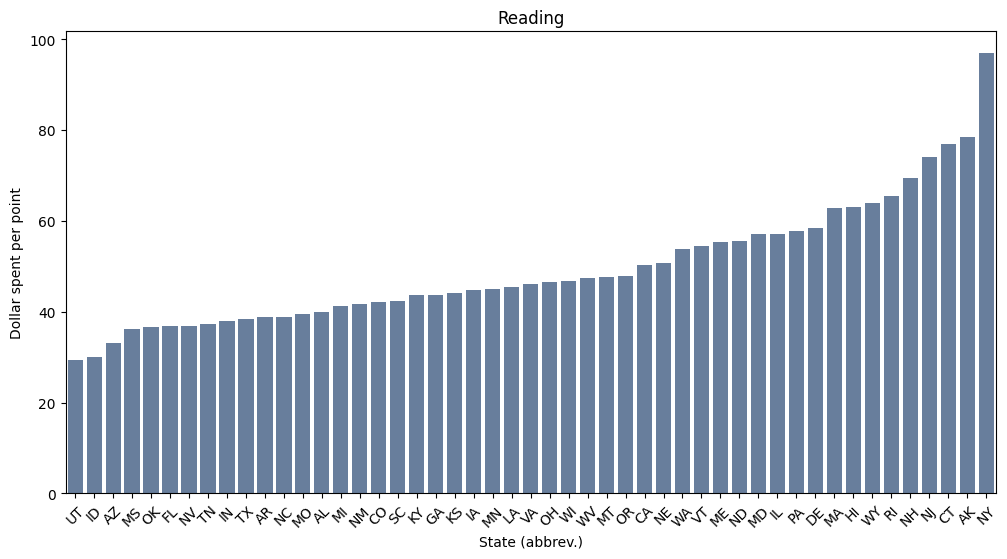

In [37]:
states_abbrev = df.states_abbrev.values # list of states in original (arbitrary) order
states_math_sorted_abbrev = [states_abbrev[i] for i in sorted_indices_math]
states_read_sorted_abbrev = [states_abbrev[i] for i in sorted_indices_read]


fig = plt.figure(figsize=(12, 6))
barchart = sns.barplot(x=df.states_abbrev, y=ratio_math, order=states_math_sorted_abbrev, color=blue)
barchart.set_xticklabels(states_math_sorted_abbrev, rotation=45)
plt.title("Math")
plt.xlabel("State (abbrev.)")
plt.ylabel("Dollar spent per point")
plt.show()

fig = plt.figure(figsize=(12, 6))
barchart = sns.barplot(x=df.states_abbrev, y=ratio_reading, order=states_read_sorted_abbrev, color=blue)
barchart.set_xticklabels(states_read_sorted_abbrev, rotation=45)
plt.title("Reading")
plt.xlabel("State (abbrev.)")
plt.ylabel("Dollar spent per point")
plt.show()

### Conclusion
Overall, it looks like more educational spending tends to translate to better scores on standardized tests. However, some states (ahem, New York) suggest that throwing more money at the problem may yield diminishing returns at some point. This suggests the problem with New York's educational system is a process problem not a funding problem.

Furthermore, it seems like a linear regression is a sufficient model to explain the correlation between these two variables.

And lastly, I created a visualization of which states are getting the best test scores per dollar spent.

### Bonus visualization
Just for fun here are three more choropleth maps showing the raw variables: educational spending, and math and reading scores.

In [13]:
# Spending map
fig = px.choropleth(df,
                    locations='states_abbrev',
                    locationmode='USA-states',
                    scope='usa',
                    color='spending',
                    color_continuous_scale=colorscale,
                    labels={'color':'Spending ($)'}
                   )
fig.update_layout(title_text='Median per pupil educational spending')
fig.show()

# Math scores map
fig = px.choropleth(df,
                    locations='states_abbrev',
                    locationmode='USA-states',
                    scope='usa',
                    color='math',
                    color_continuous_scale=colorscale,
                    labels={'color':'Math score'}
                   )
fig.update_layout(title_text='Math scores')
fig.show()

# Reading scores map
fig = px.choropleth(df,
                    locations='states_abbrev',
                    locationmode='USA-states',
                    scope='usa',
                    color='reading',
                    color_continuous_scale=colorscale,
                    labels={'color':'Reading score'}
                   )
fig.update_layout(title_text='Reading scores')
fig.show()